<img src=images/Imperial_logo_crop.png width=300 align=right />

# BUSINESS ANALYTICS: FROM DATA TO DECISIONS

# Outliers and Correlation

In [1]:
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

# Quantiles
Cut points that divide the sorted observations of a distribution into even groups.

In [2]:
# Percent point function (aka quantile function or inverse cumulative distribution function).
print(stats.norm.ppf(0.25))
print(stats.norm.ppf(0.5)) # Median
print(stats.norm.ppf(0.75))

-0.6744897501960817
0.0
0.6744897501960817


In [3]:
print(stats.norm.cdf(-0.6744897501960817))
print(stats.norm.cdf(0))
print(stats.norm.cdf(0.6744897501960817))

0.25
0.5
0.75


In [4]:
# Interquartile range.
q1 = stats.norm.ppf(0.25)
q3 = stats.norm.ppf(0.75)
iqr = q3 - q1

print(q1 - 1.5 * iqr)
print(q3 + 1.5 * iqr)

-2.697959000784327
2.697959000784327


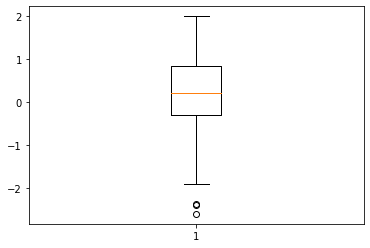

In [5]:
plt.boxplot(stats.norm.rvs(size=100))

plt.show()

### Cleaning data requires domain knowledge
To fix synonyms, mispellings, variable types (discrete vs categorical), variable **ranges**...
### Cleaning data modifies the dataset
Every time we modify a dataset, we loose some information.

Is it always wise to get rid of everything that doesn't fit?

**Overcleaning** is a thing.

# Simple linear regression
$y = b + ax$

We want to find an optimal set of values for $a$ and $b$ that minimize the residuals.

[11.27490571] [[1.71944143]]


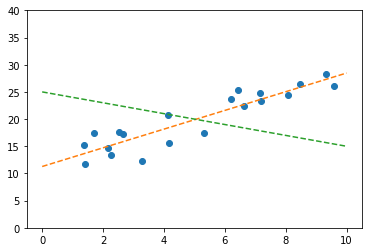

In [6]:
x = np.random.uniform(0, 10, 20)
y = 10 + x * 2 + np.random.randn(20) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)

print(lr.intercept_, lr.coef_)

plt.scatter(x, y)

x_ = np.array([[0], [10]])
plt.plot(x_, lr.predict(x_), c='tab:orange', ls='--')
plt.plot(x_, 25 - x_, c='tab:green', ls='--')
plt.ylim((0, 40))

plt.show()

### The line of best fit has a set of parameters that minimize the Mean Squared Error.

## Closed form solution

$\vec{\beta}= (X^TX)^{-1}X^T\vec{y}$

## Extra: gradient descent

In [7]:
n = 20
x = np.random.uniform(0, 10, n)
y = 0 + x * 2 + np.random.randn(n) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

coef = 2

def predict(x, coef):
    return x * coef

def mse(y_pred, y):
    return np.mean((y_pred - y)**2) / 2

y_pred = predict(x, coef)
#print(y_pred)

mse(y_pred, y)

1.4241847697680385

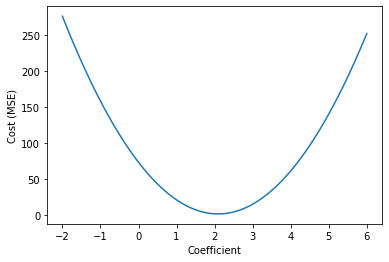

In [8]:
coefs = np.linspace(-2, 6, 100)

cost = []
for c in coefs:
    y_pred = predict(x, c)
    cost.append(mse(y_pred, y))

plt.plot(coefs, cost)
plt.xlabel('Coefficient')
plt.ylabel('Cost (MSE)')

plt.show()

In [9]:
def gradient(x, y, y_pred):
    return np.mean((y_pred - y) * x)

def update(grad, rate):
    return rate * grad

def fit(x, y, coef=0, n_iter=100, rate=0.01):
    for i in range(n_iter):
        #print(coef)
        y_pred = predict(x, coef)
        #print(mse(y_pred, y))
        grad = gradient(x, y, y_pred)
        #print(grad)
        coef -= update(grad, rate)
        
    return coef
        
fit(x, y)

2.0918702271854523

In [10]:
n = 20
x = np.random.uniform(0, 10, n)
y = -5 + x * 2 + np.random.randn(n) * 2
x, y = x.reshape(-1, 1), y.reshape(-1, 1)

x = np.concatenate([np.ones(n).reshape(-1, 1), x], axis=1)
x

array([[1.        , 7.25810262],
       [1.        , 2.96205782],
       [1.        , 8.26284134],
       [1.        , 6.85415756],
       [1.        , 3.73758137],
       [1.        , 9.46645409],
       [1.        , 8.02731621],
       [1.        , 1.56850636],
       [1.        , 8.44331129],
       [1.        , 6.6306963 ],
       [1.        , 2.87283065],
       [1.        , 5.92436727],
       [1.        , 4.44550243],
       [1.        , 1.98570055],
       [1.        , 1.69746368],
       [1.        , 6.06052148],
       [1.        , 1.91413585],
       [1.        , 5.16169408],
       [1.        , 1.40757245],
       [1.        , 4.28390642]])

In [11]:
def predict(x, coef):
    # Because 1*coef[0] + x[1]*coef[1] + ... +  x[n]*coef[n] is the dot product coef · x
    return np.dot(x, coef).reshape(-1, 1)

def gradient(x, y, y_pred):
    return np.mean((y_pred - y) * x, axis=0)

coef = fit(x, y, coef=np.zeros(2), n_iter=10000)
coef

array([-5.51711366,  2.17185575])

In [12]:
lr = LinearRegression().fit(x[:, 1:], y)
print(lr.intercept_, lr.coef_)

[-5.51711367] [[2.17185575]]


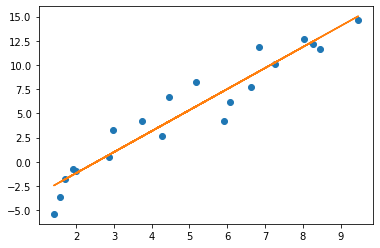

In [13]:
plt.scatter(x[:, 1], y)
plt.plot(x[:, 1], predict(x, coef), 'tab:orange')

plt.show()

# Correlation vs regression coefficient

Correlation coefficient: 0.92
Regression coefficient: 2.06


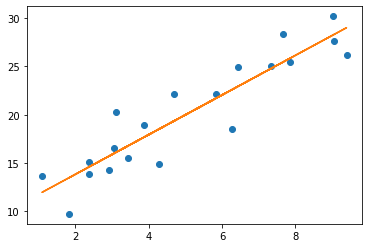

In [14]:
x = np.random.uniform(0, 10, 20)
y = 10 + x * 2 + np.random.randn(20) * 2

print('Correlation coefficient: %.2f' % np.corrcoef([x, y])[0, 1])

x, y = x.reshape(-1, 1), y.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)

print('Regression coefficient: %.2f' % lr.coef_)

plt.scatter(x, y)

plt.plot(x, lr.predict(x), c='tab:orange')

plt.show()

Correlation coefficient: 0.99
Regression coefficient: 5.41


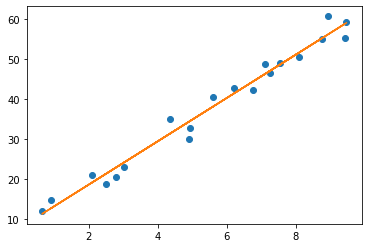

In [15]:
x = np.random.uniform(0, 10, 20)
y = 10 + x * 5 + np.random.randn(20) * 2

print('Correlation coefficient: %.2f' % np.corrcoef([x, y])[0, 1])

x, y = x.reshape(-1, 1), y.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)

print('Regression coefficient: %.2f' % lr.coef_)

plt.scatter(x, y)

plt.plot(x, lr.predict(x), c='tab:orange')

plt.show()

Correlation coefficient: -0.78
Regression coefficient: -0.88


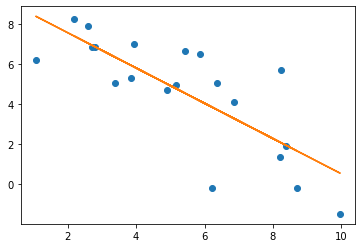

In [16]:
x = np.random.uniform(0, 10, 20)
y = 10 + x * -1 + np.random.randn(20) * 2

print('Correlation coefficient: %.2f' % np.corrcoef([x, y])[0, 1])

x, y = x.reshape(-1, 1), y.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)

print('Regression coefficient: %.2f' % lr.coef_)

plt.scatter(x, y)

plt.plot(x, lr.predict(x), c='tab:orange')

plt.show()

Correlation coefficient: 0.27
Regression coefficient: 1.41


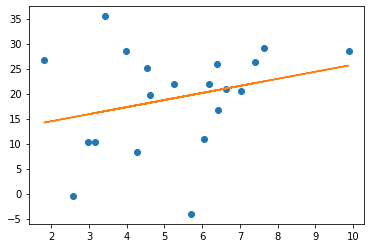

In [17]:
x = np.random.uniform(0, 10, 20)
y = 10 + x * 2 + np.random.randn(20) * 10

print('Correlation coefficient: %.2f' % np.corrcoef([x, y])[0, 1])

x, y = x.reshape(-1, 1), y.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)

print('Regression coefficient: %.2f' % lr.coef_)

plt.scatter(x, y)

plt.plot(x, lr.predict(x), c='tab:orange')

plt.show()

Correlation coefficient: -0.36
Regression coefficient: -3.75


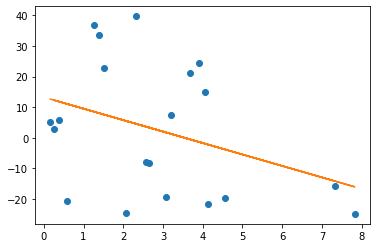

In [18]:
x = np.random.uniform(0, 10, 20)
y = 10 + x * -2 + np.random.randn(20) * 20

print('Correlation coefficient: %.2f' % np.corrcoef([x, y])[0, 1])

x, y = x.reshape(-1, 1), y.reshape(-1, 1)

lr = LinearRegression()
lr.fit(x, y)

print('Regression coefficient: %.2f' % lr.coef_)

plt.scatter(x, y)

plt.plot(x, lr.predict(x), c='tab:orange')

plt.show()